#### İlk olarak kütüphaneleri aktive ettik. Ve bankacılık veri setini okuttuk. Her olasılığı göze alarak veri setinin yedeğini oluşturduk.

#### Bankacılık Veri Seti:
* age : Müşterinin Yaşı
* job : Müşterinin İşi
* marital : Müşterinin Medeni Durumu = married : evli, single : bekar
* education : Müşterinin Eğitim Durumu = primary : ilköğretim, secondary : orta öğretim, tertiary : yüksek öğretim 
* default : Müşterinin Kusurlu Durumu Var Mı? = no : hayır, yes : evet
* balance : Müşterinin Maaşı
* housing : Müşterinin Evi Var Mı ? = no : hayır, yes : evet
* loan : Müşterinin Borcu Var Mı ? = no : hayır, yes : evet
* contact : İletişim
* day : Gün
* month : Ay
* duration : Süre
* campaign : Kampanya
* pdays : Gün
* previous : Önceki 
* poutcome : Sonuç = failure : başarısız, success : başarılı
* y : Kabul Edilme Durumu : no : hayır, yes : evet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings("ignore")

In [3]:
bankaciVeriSeti=pd.read_excel(r"C:\Users\beyza\Desktop\FirdesBeyzanurSenocak_20040718015\ExcelVerileri\banka.xlsx")
bankaciVeriSeti=bankaciVeriSeti[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']]
fbs = bankaciVeriSeti.copy()
bankaciVeriSeti.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
yeniİsimlendirmeler = ['Yaş','İş','Medeni Durum','Eğitim','Kusurlu Durum','Kazanç','Ev Sahibi Mi?','Borç Durumu','İletişim',
                       'Gün','Ay','Süre','Kampanya','Gün','Önceki','Sonuç','Kabul Durumu']
bankaciVeriSeti.columns = yeniİsimlendirmeler
bankaciVeriSeti.head()

,Yaş,İş,Medeni Durum,Eğitim,Kusurlu Durum,Kazanç,Ev Sahibi Mi?,Borç Durumu,İletişim,Gün,Ay,Süre,Kampanya,Gün,Önceki,Sonuç,Kabul Durumu
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Veri setimize kullanicilar adlı bir değişken tanımladık.

In [5]:
bankaciVeriSeti_kullanicilar = pd.DataFrame(np.arange(0,len(bankaciVeriSeti)), columns=['kullanicilar'])
bankaciVeriSeti = pd.concat([bankaciVeriSeti_kullanicilar, bankaciVeriSeti], axis=1)

#### Veri setimizde bulunan Kabul Durumu verisinin no ve yes cevaplarının kaçar tane olduğunu öğrendik.

In [6]:
bankaciVeriSeti['Kabul Durumu'].value_counts()

no     39922
yes     5289
Name: Kabul Durumu, dtype: int64

#### X değişkenine ve Y değişkenine bazı veriler atadık.

In [7]:
X = bankaciVeriSeti.drop(['Kabul Durumu','kullanicilar','İş','Medeni Durum','Eğitim','Kazanç','İletişim','Ev Sahibi Mi?',
                       'Borç Durumu','Gün','Ay','Sonuç' ], axis=1)
Y = bankaciVeriSeti['Kabul Durumu']

In [8]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

#### X sütunun da Kusurlu Durum_no verisini sildik ve Kusurlu Durum_yes verisini Kusurlu Duruma eşitledik.
#### Y sütunun da ise yes cevaplarını sildik no cevaplarını Kabul Durumuna eşitledik.

In [9]:
X.columns
X = X.drop(['Kusurlu Durum_no'], axis= 1)
X = X.rename(columns = {'Kusurlu Durum_yes': 'Kusurlu Durum'})
Y.columns
Y = Y.drop(['yes'], axis=1)
Y = Y.rename(columns= {'no': 'Kabul Durumu'})

#### X ve Y'yi train ve test verisi olarak ayırdık.

In [10]:
from sklearn.model_selection import train_test_split
XDizisi, XTest, YDizisi, YTest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [11]:
import random
pozitifindex = YDizisi[YDizisi.values == 1].index
negatifindex = YDizisi[YDizisi.values == 0].index

if len(pozitifindex) > len(negatifindex):
    yuksek = pozitifindex
    alcak = negatifindex
else:
    yuksek = negatifindex
    alcak = pozitifindex

random.seed(0)
yuksek = np.random.choice(yuksek, size=len(alcak))
alcak = np.asarray(alcak)
Yeniindex = np.concatenate((alcak, yuksek))

XDizisi = XDizisi.loc[Yeniindex]
YDizisi = YDizisi.loc[Yeniindex]

#### Logistic Regression hesapladık.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(XDizisi, YDizisi)
YTahmini = classifier.predict(XTest)
from sklearn.metrics import classification_report
print(confusion_matrix(YTest,YTahmini))
print(classification_report(YTest,YTahmini))

[[ 725  333]
 [1482 6503]]
              precision    recall  f1-score   support

           0       0.33      0.69      0.44      1058
           1       0.95      0.81      0.88      7985

    accuracy                           0.80      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.88      0.80      0.83      9043



#### Confusion (Karışıklık) Matrisini çizdirdik.

<AxesSubplot:>

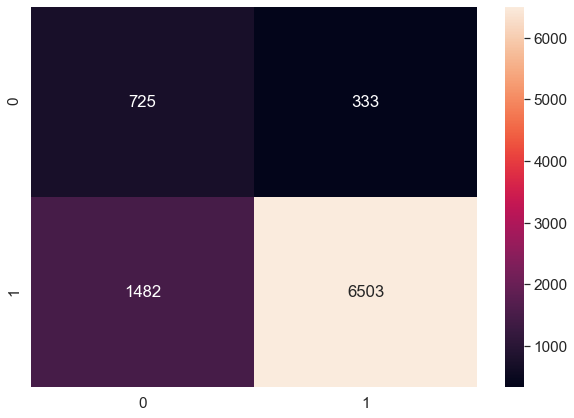

In [13]:
import matplotlib.pyplot as plt
karisiklikMatrisi = confusion_matrix(YTest, YTahmini) 
bankaciVeriSeti_karisiklikMatrisi = pd.DataFrame(karisiklikMatrisi, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(bankaciVeriSeti_karisiklikMatrisi, annot=True, fmt='g')

#### Naive Bayes hesapladık.

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

classifier = GaussianNB()
classifier.fit(XDizisi, YDizisi)

Y1Tahmini = classifier.predict(XTest)
from sklearn.metrics import classification_report
print(confusion_matrix(YTest,Y1Tahmini))
print(classification_report(YTest,Y1Tahmini))

[[ 726  332]
 [1500 6485]]
              precision    recall  f1-score   support

           0       0.33      0.69      0.44      1058
           1       0.95      0.81      0.88      7985

    accuracy                           0.80      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.88      0.80      0.83      9043



#### Confusion (Karışıklık) Matrisini çizdirdik.

<AxesSubplot:>

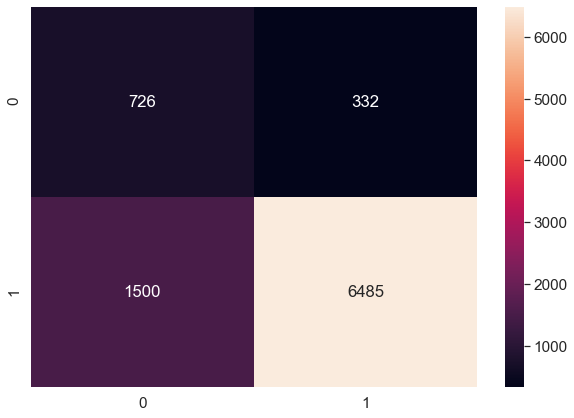

In [15]:
import matplotlib.pyplot as plt
karisiklikMatrisi = confusion_matrix(YTest, Y1Tahmini) 
bankaciVeriSeti_karisiklikMatrisi= pd.DataFrame(karisiklikMatrisi, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(bankaciVeriSeti_karisiklikMatrisi, annot=True, fmt='g')

#### Support Vector Machines hesapladık.

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
classifier.fit(XDizisi, YDizisi)

Y2Tahmini = classifier.predict(XTest)
from sklearn.metrics import classification_report
print(confusion_matrix(YTest,Y2Tahmini))
print(classification_report(YTest,Y2Tahmini))

[[ 706  352]
 [1925 6060]]
              precision    recall  f1-score   support

           0       0.27      0.67      0.38      1058
           1       0.95      0.76      0.84      7985

    accuracy                           0.75      9043
   macro avg       0.61      0.71      0.61      9043
weighted avg       0.87      0.75      0.79      9043



#### Confusion (Karışıklık) Matrisini çizdirdik.

<AxesSubplot:>

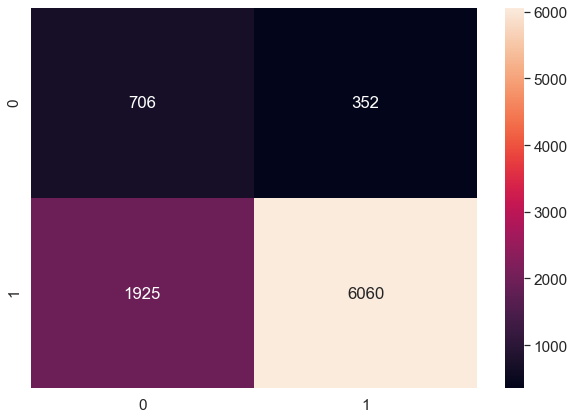

In [17]:
import matplotlib.pyplot as plt
karisiklikMatrisi = confusion_matrix(YTest, Y2Tahmini)
bankaciVeriSeti_karisiklikMatrisi = pd.DataFrame(karisiklikMatrisi, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(bankaciVeriSeti_karisiklikMatrisi, annot=True, fmt='g')

#### K-Neighbors Classifier hesapladık.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(XDizisi, YDizisi)

Y3Tahmini = classifier.predict(XTest)
from sklearn.metrics import classification_report
print(confusion_matrix(YTest,Y3Tahmini))
print(classification_report(YTest,Y3Tahmini))


[[ 773  285]
 [1879 6106]]
              precision    recall  f1-score   support

           0       0.29      0.73      0.42      1058
           1       0.96      0.76      0.85      7985

    accuracy                           0.76      9043
   macro avg       0.62      0.75      0.63      9043
weighted avg       0.88      0.76      0.80      9043



#### Confusion (Karışıklık) Matrisini çizdirdik.

<AxesSubplot:>

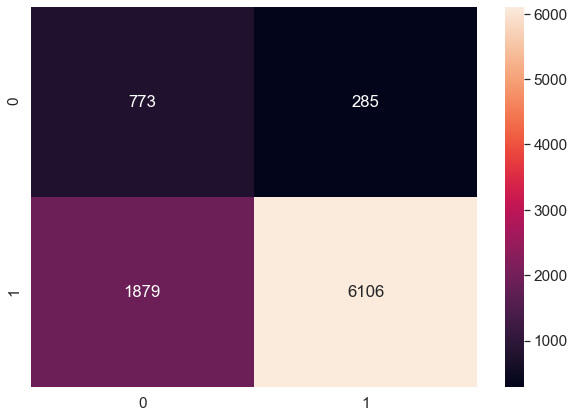

In [19]:
import matplotlib.pyplot as plt
karisiklikMatrisi = confusion_matrix(YTest, Y3Tahmini) 
bankaciVeriSeti_karisiklikMatrisi = pd.DataFrame(karisiklikMatrisi, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(bankaciVeriSeti_karisiklikMatrisi, annot=True, fmt='g')

In [20]:
from sklearn.neural_network import MLPClassifier
mlpSiniflama = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=10000)
mlpSiniflama.fit(XDizisi, YDizisi.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=10000)

In [21]:
Y4Tahmini = mlpSiniflama.predict(XTest)

#### Yapay Sinir Ağlarını hesapladık.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(YTest,Y4Tahmini))
print(classification_report(YTest,Y4Tahmini))

[[ 815  243]
 [1923 6062]]
              precision    recall  f1-score   support

           0       0.30      0.77      0.43      1058
           1       0.96      0.76      0.85      7985

    accuracy                           0.76      9043
   macro avg       0.63      0.76      0.64      9043
weighted avg       0.88      0.76      0.80      9043



#### Confusion (Karışıklık) Matrisini çizdirdik.

<AxesSubplot:>

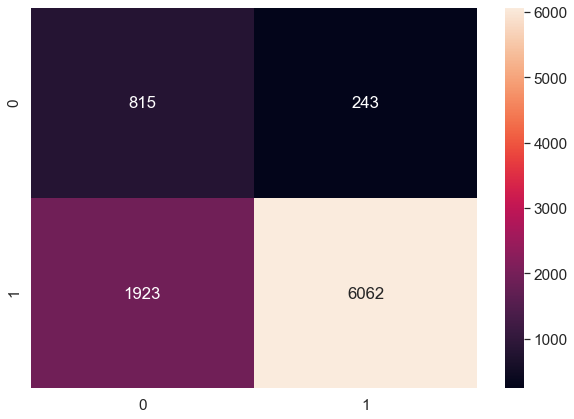

In [23]:
import matplotlib.pyplot as plt
karisiklikMatrisi = confusion_matrix(YTest, Y4Tahmini) 
bankaciVeriSeti_karisiklikMatrisi = pd.DataFrame(karisiklikMatrisi, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(bankaciVeriSeti_karisiklikMatrisi, annot=True, fmt='g')